In [1]:
import pandas as pd

In [5]:
raw_data = pd.read_csv('data/ecg.csv', sep=',', header=None)
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [6]:
raw_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [9]:
raw_data.shape

(4998, 141)

In [20]:
raw_data.columns[raw_data.isna().any()].tolist()

[]

In [22]:
X = raw_data.iloc[:, :-1]
y = raw_data[140]

In [24]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4993    0.0
4994    0.0
4995    0.0
4996    0.0
4997    0.0
Name: 140, Length: 4998, dtype: float64

In [25]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
pd.DataFrame(X_scaled).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
count,4998.00,4998.00,4998.00,4998.00,4998.00,4998.00,4998.00,4998.00,4998.00,4998.00,...,4998.00,4998.00,4998.00,4998.00,4998.00,4998.00,4998.00,4998.00,4998.00,4998.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-5.61,-3.76,-1.90,-1.72,-2.00,-2.72,-3.43,-4.04,-4.18,-4.88,...,-3.52,-3.02,-2.73,-2.25,-1.97,-2.10,-1.97,-2.61,-2.95,-3.81
25%,-0.64,-0.73,-0.85,-0.85,-0.76,-0.68,-0.69,-0.59,-0.57,-0.65,...,-0.68,-0.83,-0.93,-0.99,-1.08,-1.09,-0.99,-0.81,-0.64,-0.63
50%,-0.03,-0.01,-0.07,-0.21,-0.27,-0.09,-0.02,0.08,-0.02,0.04,...,0.28,0.42,0.47,0.46,0.41,0.35,0.31,0.24,0.18,0.10
75%,0.66,0.67,0.71,0.68,0.58,0.52,0.61,0.50,0.54,0.70,...,0.78,0.78,0.79,0.81,0.85,0.86,0.87,0.86,0.81,0.69
max,4.54,3.55,3.72,3.85,4.81,4.94,5.66,5.78,4.86,4.31,...,2.40,2.09,1.77,1.68,1.67,1.97,2.08,2.27,2.68,5.73


In [26]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [28]:
X_test.shape

(1500, 140)

In [29]:
from sklearn import svm
classifier = svm.SVC(C=1, kernel='rbf', gamma=50)

classifier.fit(X_train, y_train)

SVC(C=1, gamma=50)

In [30]:
y_pred = classifier.decision_function(X_test)

In [31]:
y_pred

array([0.28864971, 0.28864971, 0.28864971, ..., 0.28864971, 0.28864971,
       0.28864971])

Text(0, 0.5, 'Taux Vrais positifs')

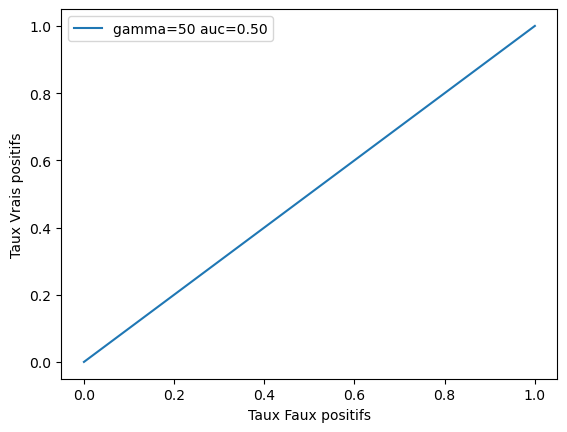

In [33]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thres = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

ax = plt.gca()
ax.plot(fpr, tpr, label=f'gamma=50 auc={auc:.2f}')
ax.legend()
ax.set_xlabel('Taux Faux positifs')
ax.set_ylabel('Taux Vrais positifs')

In [37]:
import numpy as np
params = {'C': np.logspace(-3,3,7), 'gamma':np.logspace(-2,1,10), 'kernel':['rbf']}

classifier = svm.SVC()
grid = model_selection.GridSearchCV(classifier, param_grid=params, cv=3, scoring='roc_auc', n_jobs=-1, verbose=True, return_train_score=True)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ]),
                         'kernel': ['rbf']},
             return_train_score=True, scoring='roc_auc', verbose=True)

In [38]:
grid.best_params_

{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}

Text(0, 0.5, 'Taux Vrais positifs')

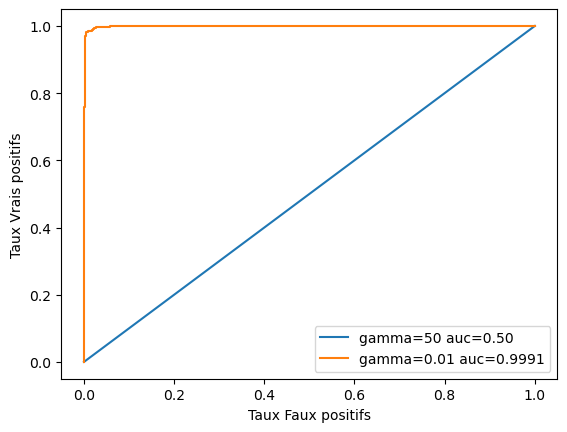

In [40]:
best_classifier = svm.SVC(**grid.best_params_)
best_classifier.fit(X_train, y_train)
best_y_pred = best_classifier.decision_function(X_test)

best_fpr, best_tpr, best_thres = metrics.roc_curve(y_test, best_y_pred)
best_auc = metrics.roc_auc_score(y_test, best_y_pred)

ax = plt.gca()
ax.plot(fpr, tpr, label=f'gamma=50 auc={auc:.2f}')
ax.plot(best_fpr, best_tpr, label=f'gamma=0.01 auc={best_auc:.4f}')

ax.legend()
ax.set_xlabel('Taux Faux positifs')
ax.set_ylabel('Taux Vrais positifs')